In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
df = df.drop('car name', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


from the above five point summary i conclude that disp and hp are right skewed  

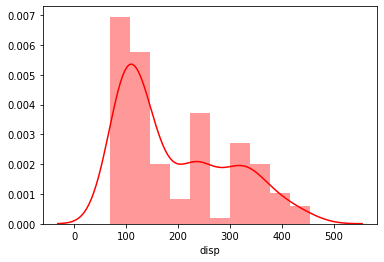

In [30]:
sns.distplot(df['disp'],color='r')

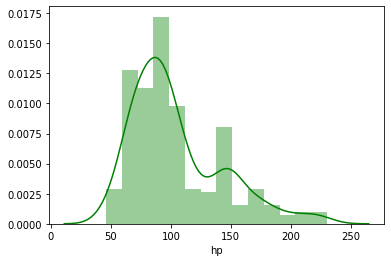

In [31]:
sns.distplot(df['hp'],color='g')

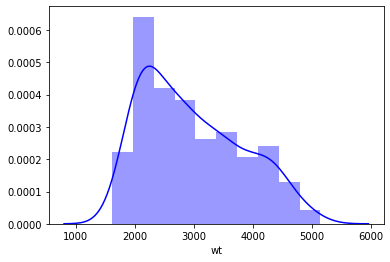

In [33]:
sns.distplot(df['wt'],color='b')

In [6]:
ls =df.columns.tolist()
df[ls].isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [7]:
df[ls].isna().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [8]:
temp = pd.DataFrame(df.hp.str.isdigit())
temp[temp['hp'] == False]   

df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

df['hp'] = df['hp'].astype('float64')  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


2. Use pair plot or scatter matrix to visualize how the different variables are related

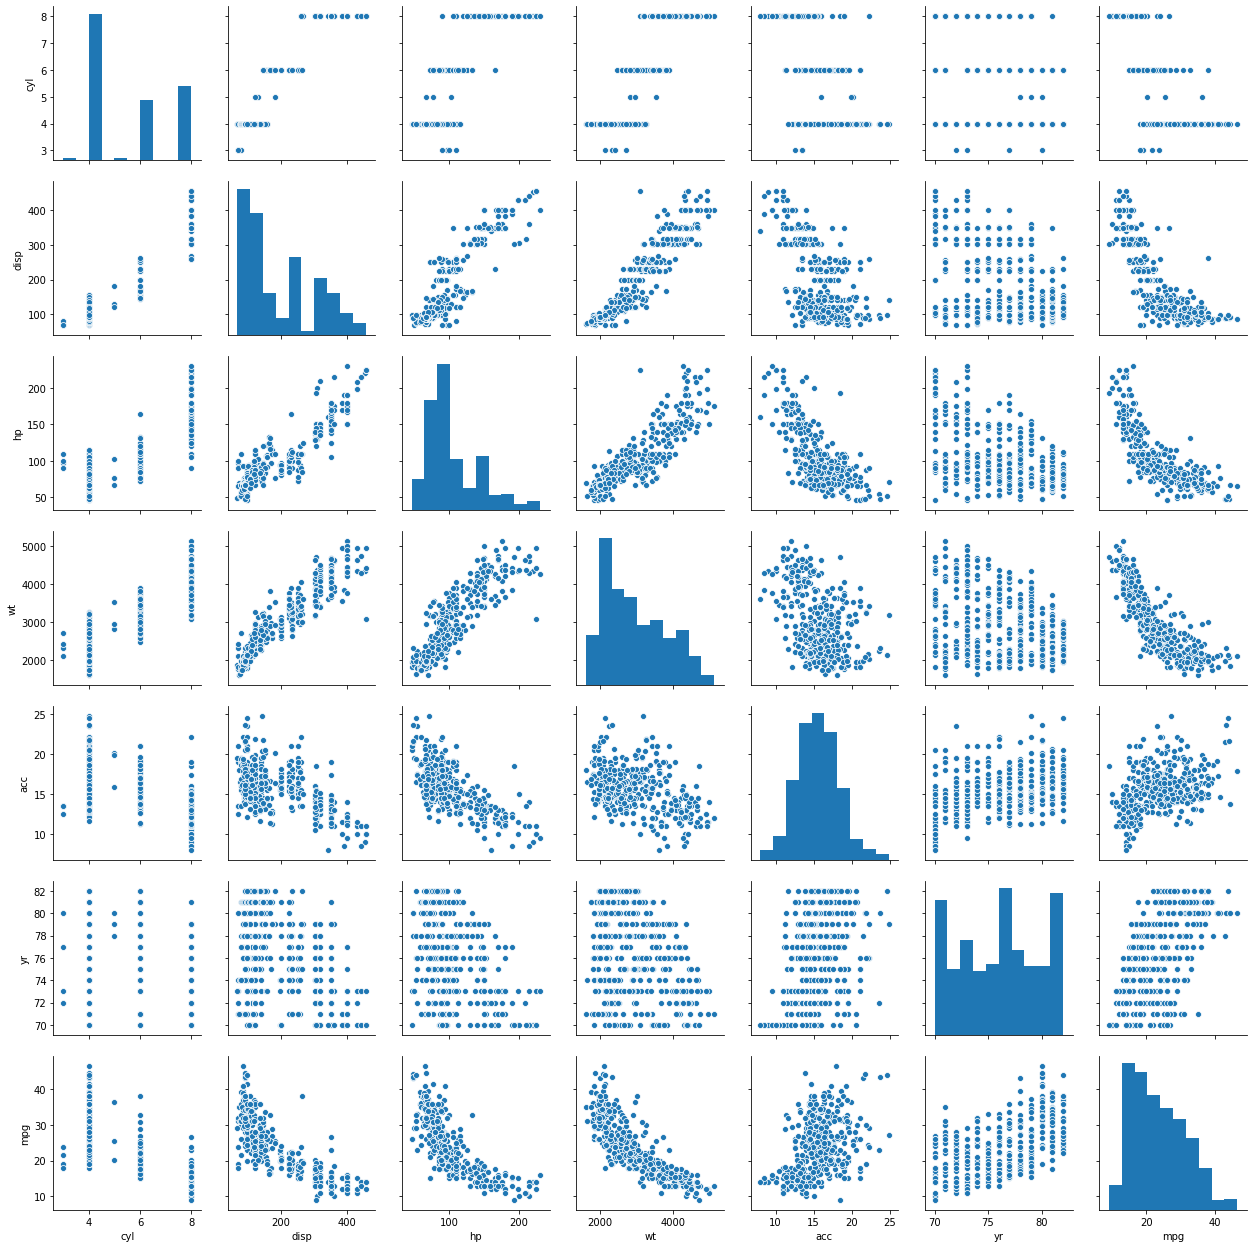

In [10]:
sns.pairplot(df)

there is a negative correlation between "mpg" and "displacement","horsepower" & "weight" and "mpg" seems positively correlated to "acceleration".

3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters

In [11]:
from scipy.stats import zscore

df_attr_z = df.apply(zscore)

In [12]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 6)   # seems 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905671e+07
3,5,1.376961e+07


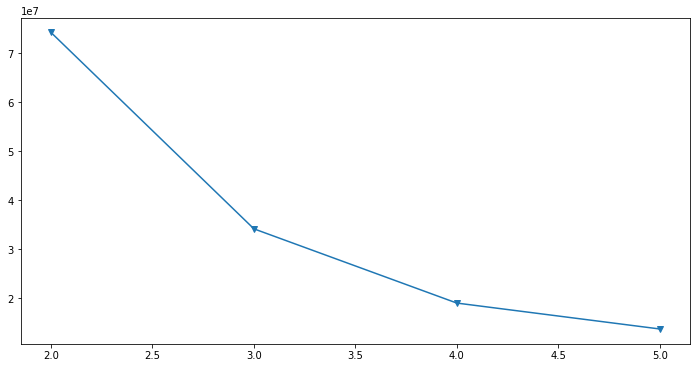

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "v" )

The elbow plot confirms our analysis that 3, 4 clusters might exist.so we will take k =3

In [14]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_attr_z)
df_attr_z_copy = df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [15]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51412926,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [ 0.35772459,  0.24687769, -0.04275477,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.309923,0.753947
1,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-1.158713
2,0.357725,0.246878,-0.042755,0.308299,0.285786,-0.002721,-0.479054


In [17]:
prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction

df_attr_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,207,207,207,207,207,207,207
1,95,95,95,95,95,95,95
2,96,96,96,96,96,96,96


In [18]:
df_attr_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1


In [19]:
#Normalised data with the cluster id in column 'GROUP'

4. Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [20]:
df_attr_z_0 = df_attr_z[df_attr_z['GROUP']==0]
df_attr_z_1 = df_attr_z[df_attr_z['GROUP']==1]
df_attr_z_2 = df_attr_z[df_attr_z['GROUP']==2]

X = df_attr_z_0.drop('mpg',axis=1)
y = df_attr_z_0['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("GROUP 0: The coefficient for {} is {}  ".format(col_name, regression_model.coef_[idx]))

GROUP 0: The coefficient for cyl is 1.2090353415723458  
GROUP 0: The coefficient for disp is -0.3696807016884515  
GROUP 0: The coefficient for hp is -0.049172054404926134  
GROUP 0: The coefficient for wt is -0.9733601958976634  
GROUP 0: The coefficient for acc is 0.10277014406615494  
GROUP 0: The coefficient for yr is 0.44509099720660017  
GROUP 0: The coefficient for GROUP is 0.0  


In [23]:
X = df_attr_z_1.drop('mpg',axis=1)
y = df_attr_z_1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("GROUP 1: The coefficient for {} is {}  ".format(col_name, regression_model.coef_[idx]))

GROUP 1: The coefficient for cyl is 0.3276018056756721  
GROUP 1: The coefficient for disp is 0.02758432302475807  
GROUP 1: The coefficient for hp is -0.15817513612143716  
GROUP 1: The coefficient for wt is -0.16674110967878053  
GROUP 1: The coefficient for acc is -0.15287738834565065  
GROUP 1: The coefficient for yr is 0.16417548808069926  
GROUP 1: The coefficient for GROUP is 0.0  


In [26]:
X = df_attr_z_2.drop('mpg',axis=1)
y = df_attr_z_2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [27]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("GROUP 2: The coefficient for {} is {}  ".format(col_name, regression_model.coef_[idx]))

GROUP 2: The coefficient for cyl is 0.22050756505103541  
GROUP 2: The coefficient for disp is -0.08679578037169473  
GROUP 2: The coefficient for hp is -0.07076158740571913  
GROUP 2: The coefficient for wt is -0.4384333394236075  
GROUP 2: The coefficient for acc is -0.08339849223362944  
GROUP 2: The coefficient for yr is 0.21650975980492626  
GROUP 2: The coefficient for GROUP is 0.0  
